<a href="https://colab.research.google.com/github/surya323-ma/machine-larning-/blob/main/mail_customer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python

Dataset loaded successfully. First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score

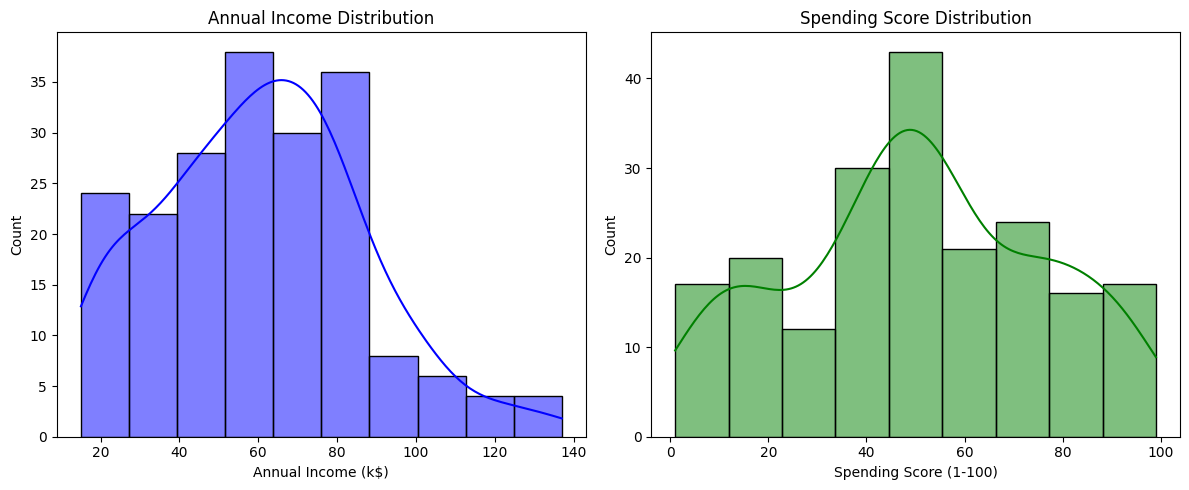

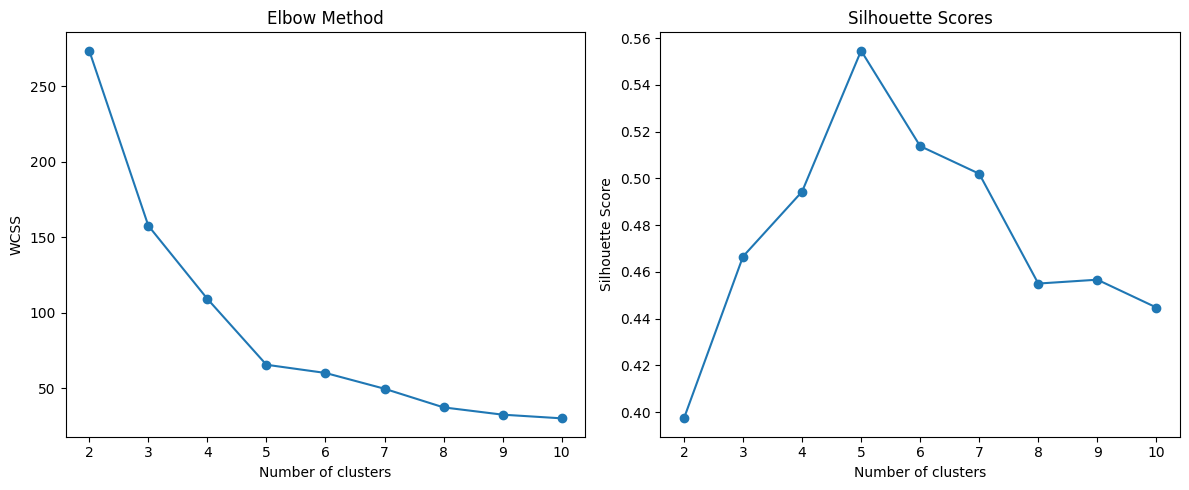

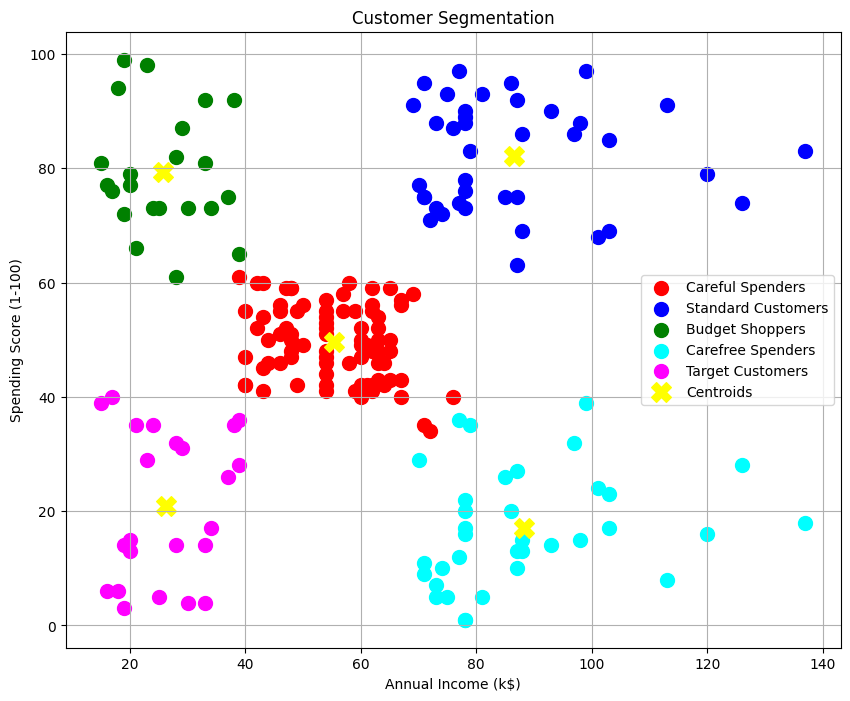


Cluster Analysis:
           Age Annual Income (k$)            Spending Score (1-100)  \
        median               mean        std                   mean   
Cluster                                                               
0         46.0          55.296296   8.988109              49.518519   
1         32.0          86.538462  16.312485              82.128205   
2         23.5          25.727273   7.566731              79.363636   
3         42.0          88.200000  16.399067              17.114286   
4         46.0          26.304348   7.893811              20.913043   

                     Gender Count  
               std <lambda>        
Cluster                            
0         6.530909   Female    81  
1         9.364489   Female    39  
2        10.504174   Female    22  
3         9.952154     Male    35  
4        13.017167   Female    23  

Cluster Interpretation:

1. Careful Spenders (Red): High income but low spending - potential for premium offers
2. Standard

In [2]:
# Install required packages
!pip install kagglehub scikit-learn pandas matplotlib seaborn numpy

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Download the dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

# Load the data
df = pd.read_csv(f"{path}/Mall_Customers.csv")
print("\nDataset loaded successfully. First few rows:")
print(df.head())

# Data Exploration
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Visualize the distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True, color='blue')
plt.title('Annual Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the plots, choose optimal clusters (5 appears good)
optimal_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = [
    'Careful Spenders',
    'Standard Customers',
    'Budget Shoppers',
    'Carefree Spenders',
    'Target Customers'
]

for i in range(optimal_clusters):
    plt.scatter(
        X[y_kmeans == i, 0], X[y_kmeans == i, 1],
        s=100, c=colors[i],
        label=cluster_names[i]
    )

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='yellow',
    label='Centroids', marker='X'
)

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# Analyze clusters
print("\nCluster Analysis:")
cluster_stats = df.groupby('Cluster').agg({
    'Age': 'median',
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0]
})

cluster_stats['Count'] = df['Cluster'].value_counts()
print(cluster_stats)

# Interpretation
print("\nCluster Interpretation:")
interpretation = """
1. Careful Spenders (Red): High income but low spending - potential for premium offers
2. Standard Customers (Blue): Middle-class with average spending - focus on retention
3. Budget Shoppers (Green): Low income and low spending - value-based marketing
4. Carefree Spenders (Cyan): Low income but high spending - credit/loyalty programs
5. Target Customers (Magenta): High income and high spending - focus marketing efforts
"""
print(interpretation)

# Save results
df.to_csv('segmented_customers.csv', index=False)
print("\nResults saved to 'segmented_customers.csv'")
